<a href="https://colab.research.google.com/github/kdolfo/PythonPandas/blob/main/SM1_quinta_feira_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
turmas = pd.read_csv('../content/drive/MyDrive/MachineLearning/turmas-2022-06-v1.csv', sep=',', encoding='utf-8')
cursos = pd.read_csv('../content/drive/MyDrive/MachineLearning/cursos-de-graduao-03-2023.csv', sep=',', encoding='utf-8')

In [ ]:
# 2. Verificando colunas-chave
print(turmas.dtypes)

id_turma                      int64
codigo_turma                 object
id_docente_interno          float64
id_docente_externo          float64
observacao                   object
id_componente_curricular     object
nivel_ensino                 object
campus_turma                 object
local                        object
ano                          object
periodo                      object
data_inicio                  object
data_fim                     object
descricao_horario            object
total_solicitacoes           object
capacidade_aluno             object
tipo                         object
distancia                    object
data_consolidacao            object
qtd_aulas_lancadas           object
situacao_turma               object
convenio                     object
modalidade_participantes     object
Unnamed: 23                  object
Unnamed: 24                  object
Unnamed: 25                  object
Unnamed: 26                  object
Unnamed: 27                 

In [ ]:
print(cursos.dtypes)

area_conhecimento           object
codigo_inep                  int64
website                     object
tipo_oferta                 object
municipio                   object
campus                      object
id_curso                     int64
tipo_ciclo_formacao         object
nome                        object
turno                       object
id_servidor                float64
convenio_academico         float64
nivel_ensino               float64
id_unidade_responsavel       int64
data_funcionamento          object
modalidade_educacao         object
grau_academico              object
portaria_reconhecimento      int64
coordenador                 object
situacao_curso              object
dtype: object


In [ ]:
turmas['id_componente_curricular'] = pd.to_numeric(turmas['id_componente_curricular'], errors='coerce')

IndexError: index 0 is out of bounds for axis 0 with size 0

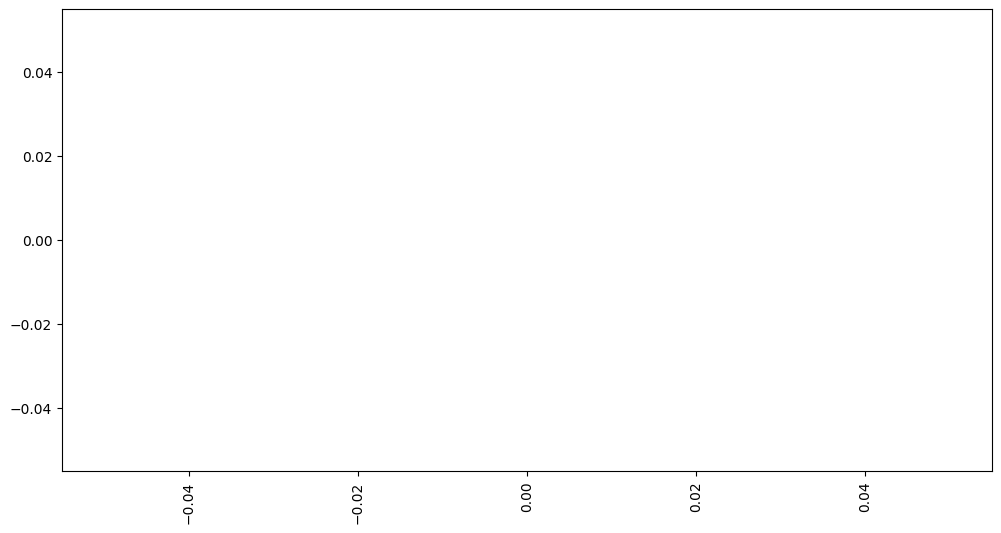

In [ ]:
# 3. Supondo que 'id_componente_curricular' da base de turmas se relacione com 'id_curso' da base de cursos
turmas_cursos = turmas.merge(cursos, left_on='id_componente_curricular', right_on='id_curso', how='left')

# 4. Agrupando e contando turmas por curso
turmas_por_curso = turmas_cursos.groupby('nome')['id_turma'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
turmas_por_curso.head(10).plot(kind='bar')  # Top 10 cursos com mais turmas
plt.title('Número de Turmas por Curso (2022)')
plt.xlabel('Curso')
plt.ylabel('Quantidade de Turmas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Não existe relação entre os dois arquivos... Por isso não funcionou.

Text(0.5, 1.0, 'Top 10 de Turmas por Componente Curricular')

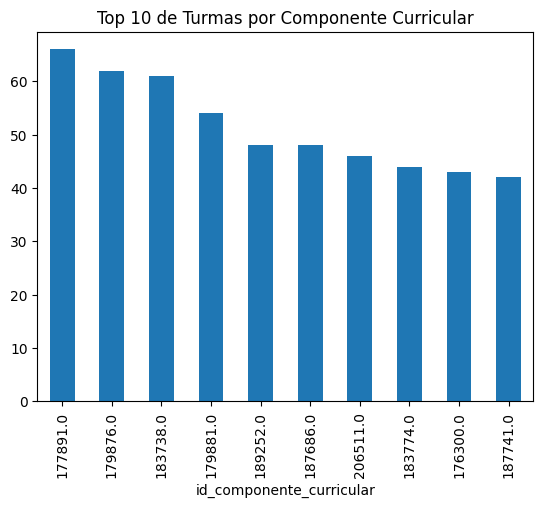

In [ ]:
turmas_por_componente = turmas['id_componente_curricular'].value_counts(sort='ascending')

turmas_por_componente.head(10).plot(kind='bar'),
figsize=(10,5),
plt.title('Top 10 de Turmas por Componente Curricular')

Text(0.5, 1.0, 'Top 10 de Turmas por Componente Curricular')

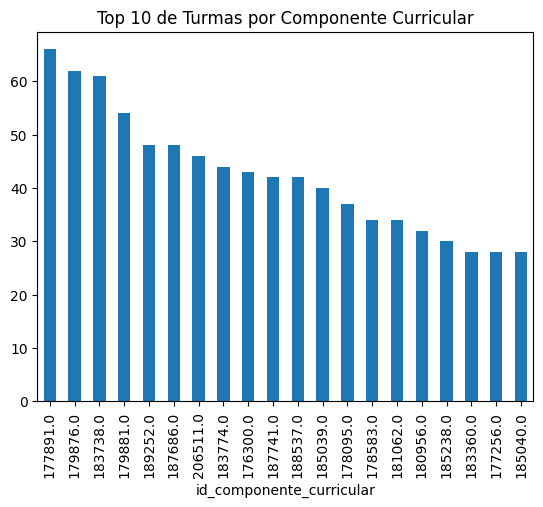

In [ ]:
turmas_por_componente.head(20).plot(kind='bar'),
figsize=(20,5),
plt.title('Top 10 de Turmas por Componente Curricular')

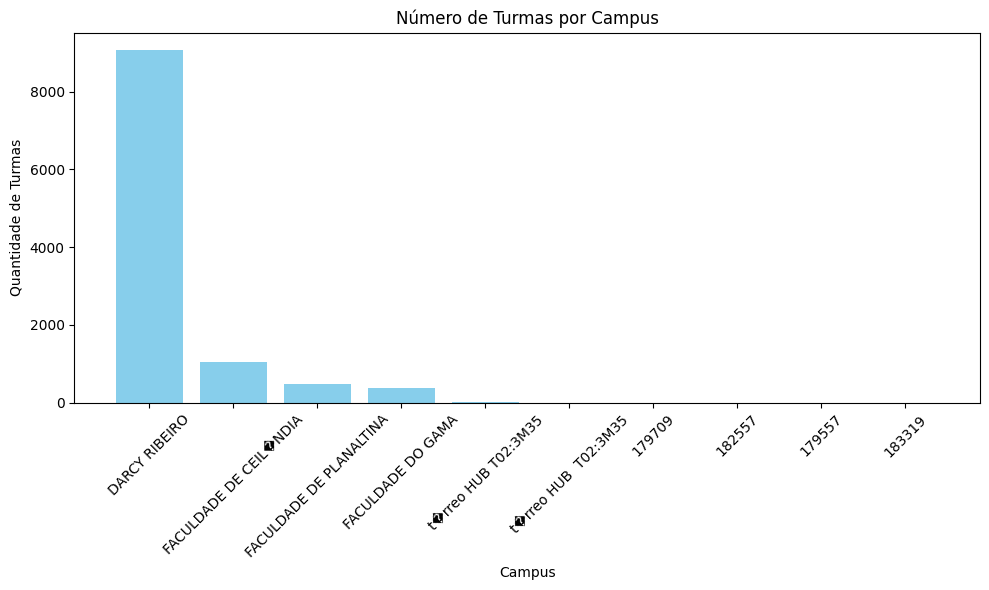

In [ ]:
#turmas por campus
turmas_por_campus = turmas['campus_turma'].value_counts(sort='ascending').reset_index()
turmas_por_campus.columns = ['campus', 'quantidade']


plt.figure(figsize=(10, 6))
plt.bar(turmas_por_campus['campus'], turmas_por_campus['quantidade'], color='skyblue')
plt.title('Número de Turmas por Campus')
plt.xlabel('Campus')
plt.ylabel('Quantidade de Turmas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Exemplo usando Plotly Express:
fig = px.bar(turmas_por_campus, x='campus', y='quantidade',
             title='Número de Turmas por Campus', text='quantidade')
fig.show()

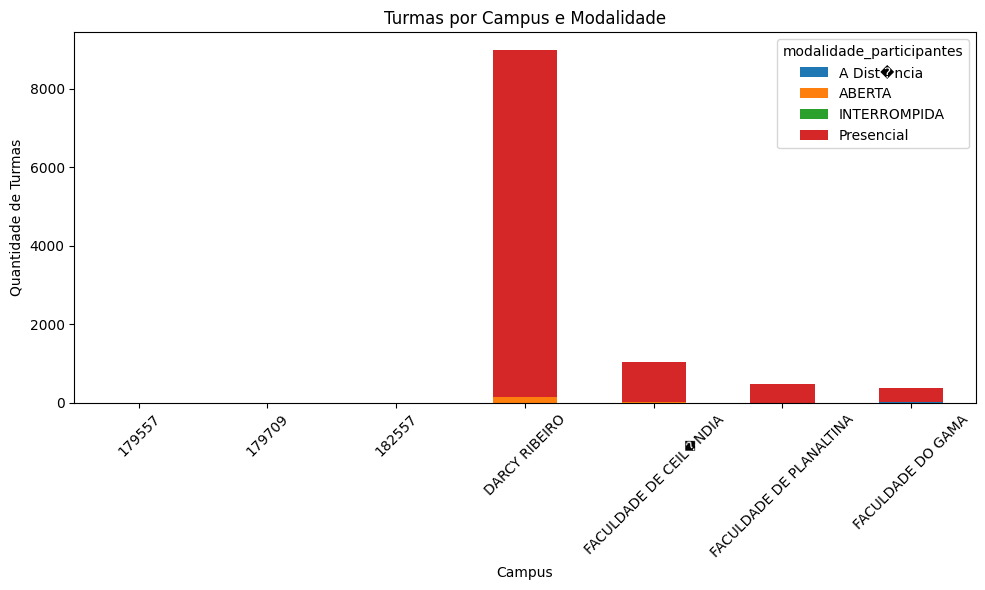

In [ ]:
turmas_campus_modalidade = pd.crosstab(turmas['campus_turma'],turmas['modalidade_participantes'])
turmas_campus_modalidade.plot(kind='bar', stacked='true', figsize=(10,6))
plt.title('Turmas por Campus e Modalidade')
plt.xlabel('Campus')
plt.ylabel('Quantidade de Turmas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_long = turmas_campus_modalidade.reset_index().melt(id_vars='campus_turma',
                                                      var_name='Modalidade',
                                                      value_name='Quantidade')

fig = px.bar(df_long, x='campus_turma', y='Quantidade', color='Modalidade',
             title='Número de Turmas por Campus e Modalidade',
             labels={'campus_turma': 'Campus'})
fig.show()

In [ ]:
campus_area_conhecimento = pd.crosstab(cursos['campus'],cursos['area_conhecimento'])
print(campus_area_conhecimento)

area_conhecimento        Ciências Agrárias  Ciências Biológicas  \
campus                                                            
DARCY RIBEIRO                            3                    4   
FACULDADE DE CEILÂNDIA                   0                    0   
FACULDADE DE PLANALTINA                  0                    0   
FACULDADE DO GAMA                        0                    0   

area_conhecimento        Ciências Exatas e da Terra  Ciências Humanas  \
campus                                                                  
DARCY RIBEIRO                                    16                21   
FACULDADE DE CEILÂNDIA                            0                 0   
FACULDADE DE PLANALTINA                           1                 3   
FACULDADE DO GAMA                                 0                 0   

area_conhecimento        Ciências Sociais Aplicadas  Ciências da Saúde  \
campus                                                                   
DARCY RIBE

In [ ]:
#usando pivot_table
campus_area_conhecimento = cursos.pivot_table(index='area_conhecimento',
                              columns='campus',
                              aggfunc='size',
                              fill_value=0)
print(campus_area_conhecimento)


campus                       DARCY RIBEIRO  FACULDADE DE CEILÂNDIA  \
area_conhecimento                                                    
Ciências Agrárias                        3                       0   
Ciências Biológicas                      4                       0   
Ciências Exatas e da Terra              16                       0   
Ciências Humanas                        21                       0   
Ciências Sociais Aplicadas              23                       0   
Ciências da Saúde                        9                       6   
Engenharias                              8                       0   
Lingüística, Letras e Artes             44                       0   
Outra                                    8                       0   

campus                       FACULDADE DE PLANALTINA  FACULDADE DO GAMA  
area_conhecimento                                                        
Ciências Agrárias                                  0                  0  
Ciência

In [ ]:
#no Plotty
tabela_long = cursos.reset_index().melt(id_vars='area_conhecimento',
                                        var_name='Campus',
                                        value_name='Quantidade')

fig = px.bar(tabela_long, x='area_conhecimento', y='Quantidade',
             color='Campus',
             title='Cursos por Área de Conhecimento e Campus',
             labels={'area_conhecimento': 'Área de Conhecimento'})
fig.show()

In [ ]:
#invertendo no pivot table
campus_area_conhecimento = cursos.pivot_table(index='campus',
                                              columns='area_conhecimento',
                                              aggfunc='size',
                                              fill_value=0)
print(campus_area_conhecimento)

area_conhecimento        Ciências Agrárias  Ciências Biológicas  \
campus                                                            
DARCY RIBEIRO                            3                    4   
FACULDADE DE CEILÂNDIA                   0                    0   
FACULDADE DE PLANALTINA                  0                    0   
FACULDADE DO GAMA                        0                    0   

area_conhecimento        Ciências Exatas e da Terra  Ciências Humanas  \
campus                                                                  
DARCY RIBEIRO                                    16                21   
FACULDADE DE CEILÂNDIA                            0                 0   
FACULDADE DE PLANALTINA                           1                 3   
FACULDADE DO GAMA                                 0                 0   

area_conhecimento        Ciências Sociais Aplicadas  Ciências da Saúde  \
campus                                                                   
DARCY RIBE

In [ ]:
#invertendo no plotty
tabela_long = cursos.reset_index().melt(id_vars='campus',
                                        var_name='area_conhecimento',
                                        value_name='Quantidade')

fig = px.bar(tabela_long, x='campus', y='Quantidade',
             color='area_conhecimento',
             title='Cursos por Área de Conhecimento e Campus',
             labels={'area_conhecimento': 'Área de Conhecimento'})
fig.show()